<a href="https://colab.research.google.com/github/falastayn/CppCLR_WinFormsProject1/blob/master/10223347_2EA17_bagas_tri_handoyo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from pandas.plotting import autocorrelation_plot
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# read data as pandas data frame
url_data ="https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/data.csv"
data = pd.read_csv(url_data)
data = data.drop(['Unnamed: 32', 'id'], axis = 1)

## Melihat 5 baris awal dari dataset yang digunakan
data.head()



,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
##
data.shape

(569, 31)

In [ ]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

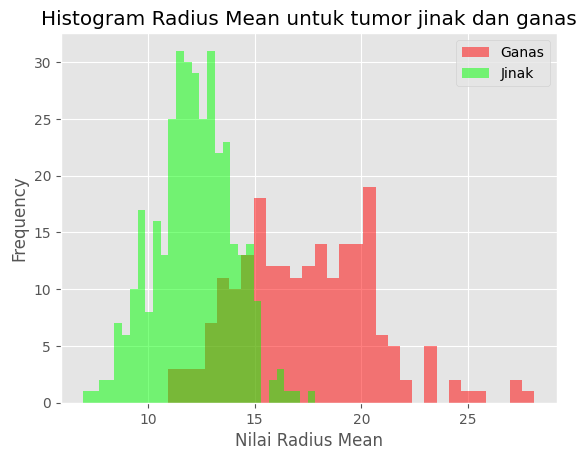

Rata-rata radius ganas yang paling sering adalah:  20.101999999999997


In [ ]:
## ploting untuk data tumor dengan label ganas
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins = 30, fc = (1,0,0,0.5), label = "Ganas")
## ploting untuk data tumor dengan Label jinak
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean, bins = 30, fc = (0,1,0,0.5), label = "Jinak")
plt.legend()
plt.xlabel("Nilai Radius Mean")
plt.ylabel("Frequency")
plt.title("Histogram Radius Mean untuk tumor jinak dan ganas")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1] [index_frequent_malignant_radius_mean]
print("Rata-rata radius ganas yang paling sering adalah: ",most_frequent_malignant_radius_mean)

In [ ]:
data_jinak = data[data["diagnosis"] == "B"]
data_ganas = data[data["diagnosis"] == "M"]
desc = data_jinak.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Apa pun di luar kisaran ini adalah outlier: (", lower_bound,",", upper_bound,")")
data_jinak[data_jinak.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_jinak[(data_jinak.radius_mean < lower_bound) | (data_jinak.radius_mean > upper_bound)].radius_mean.values)


Apa pun di luar kisaran ini adalah outlier: ( 7.645000000000001 , 16.805 )
Outliers:  [ 6.981 16.84  17.85 ]


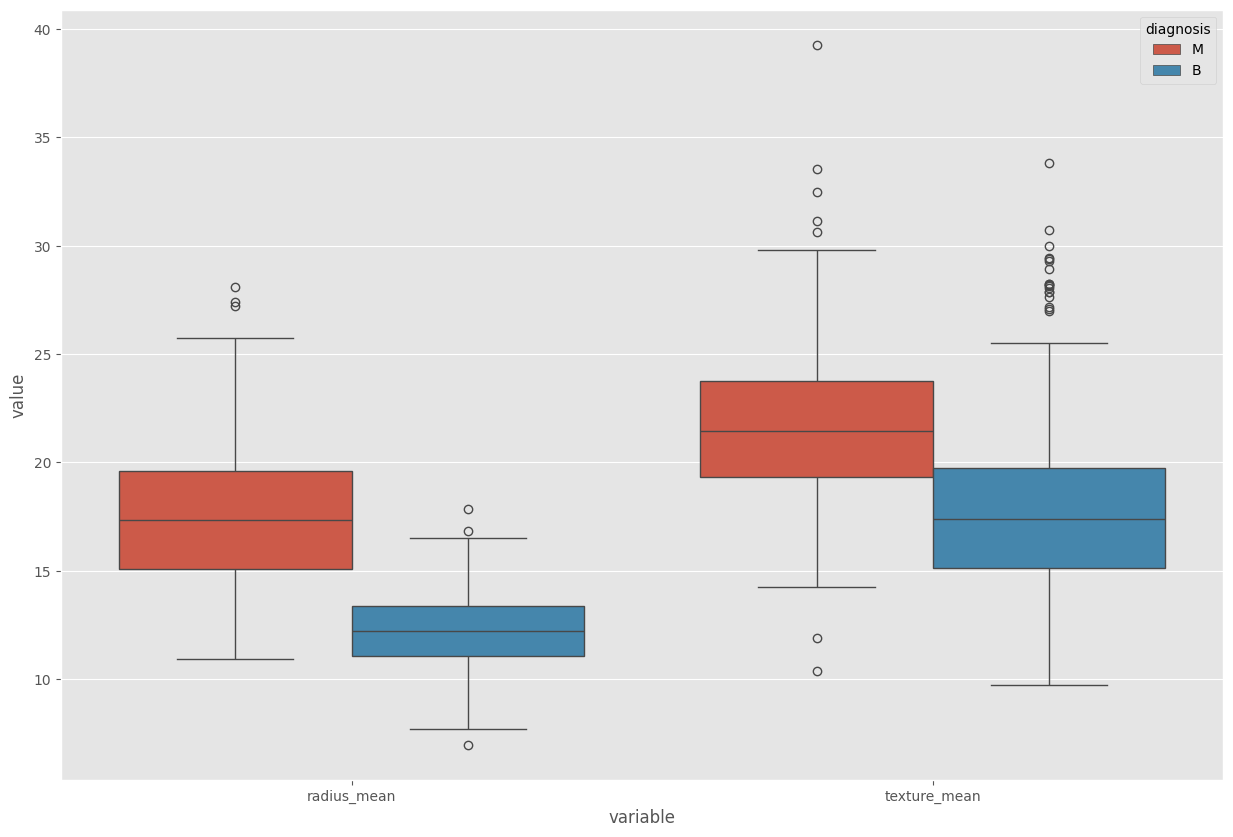

In [ ]:
melted_data = pd.melt(data,id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data = melted_data)
plt.show()

In [ ]:
print("mean:",data_jinak.radius_mean.mean())
print("variance: ",data_jinak.radius_mean.var())
print("standart deviation (std): ",data_jinak.radius_mean.std())
print("describe method: ",data_jinak.radius_mean.describe())

mean: 12.146523809523808
variance:  3.170221722043872
standart deviation (std):  1.7805116461410389
describe method:  count    357.000000
mean      12.146524
std        1.780512
min        6.981000
25%       11.080000
50%       12.200000
75%       13.370000
max       17.850000
Name: radius_mean, dtype: float64


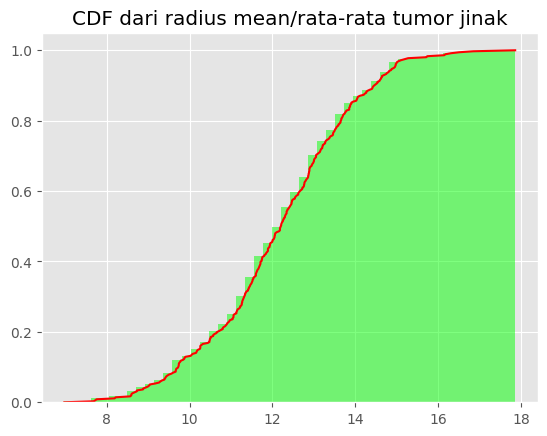

In [ ]:
plt.hist(data_jinak.radius_mean, bins=50,fc=(0,1,0,0.5), label='Jinak', density=True, cumulative = True)
sorted_data = np.sort(data_jinak.radius_mean)
y = np.arange(len(sorted_data))/float(len(sorted_data)-1)
plt.plot(sorted_data,y,color='red')
plt.title('CDF dari radius mean/rata-rata tumor jinak')
plt.show()

In [ ]:
mean_diff = data_ganas.radius_mean.mean() - data_jinak.radius_mean.mean()
var_bening = data_jinak.radius_mean.var()
var_malignant = data_ganas.radius_mean.var()
var_pooled = (len(data_jinak)*var_bening + len(data_ganas)*var_malignant) / float(len(data_jinak)+ len(data_ganas))
effect_size = mean_diff/np.sqrt(var_pooled)
print("Effect size: ",effect_size)

Effect size:  2.204858516504142


<Figure size 1500x1000 with 0 Axes>

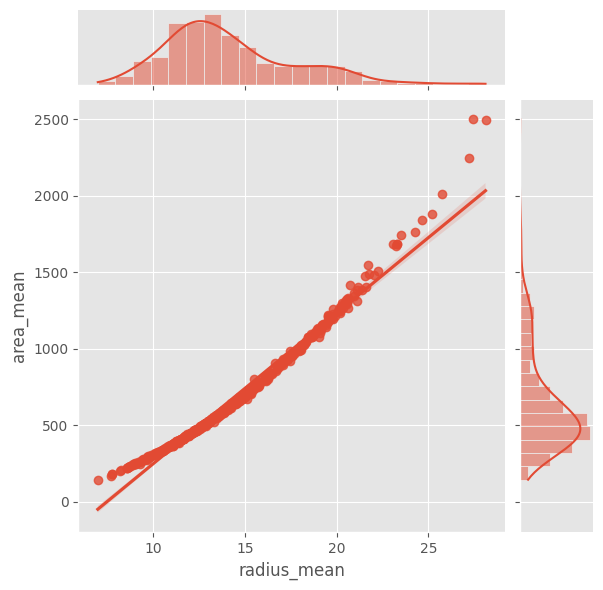

In [ ]:
plt.figure(figsize = (15,10))
sns.jointplot(x=data.radius_mean, y=data.area_mean, kind="reg") # Pass x and y as keyword arguments
plt.show()

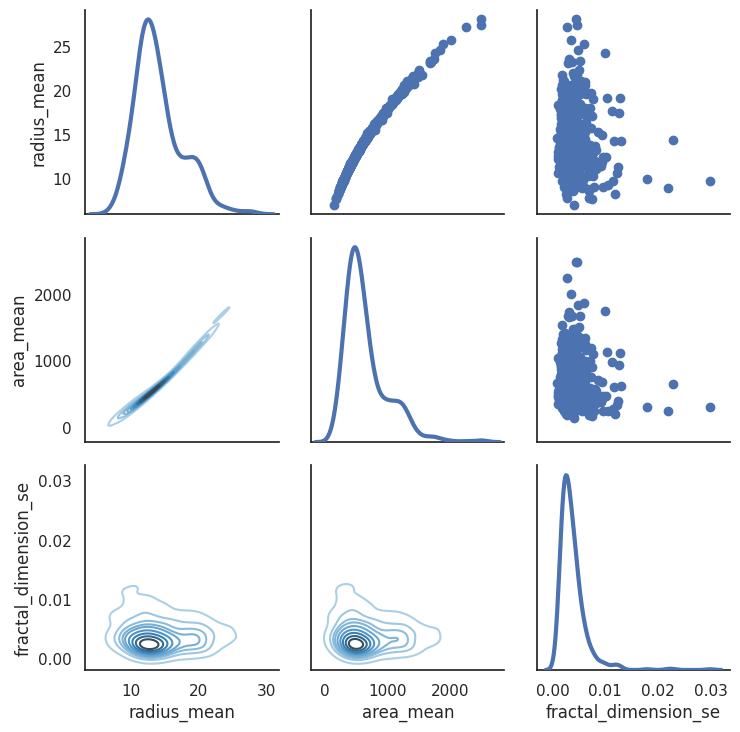

In [ ]:
# dan juga kita dapat melihat hubungan antara lebih dari 2 distribusi sns.set(style = "white")
sns.set(style = "white")
df = data.loc[:,["radius_mean","area_mean", "fractal_dimension_se"]] # Assign the result to df and remove the extra df
g = sns.PairGrid(df, diag_sharey = False,)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw =3)
plt.show()









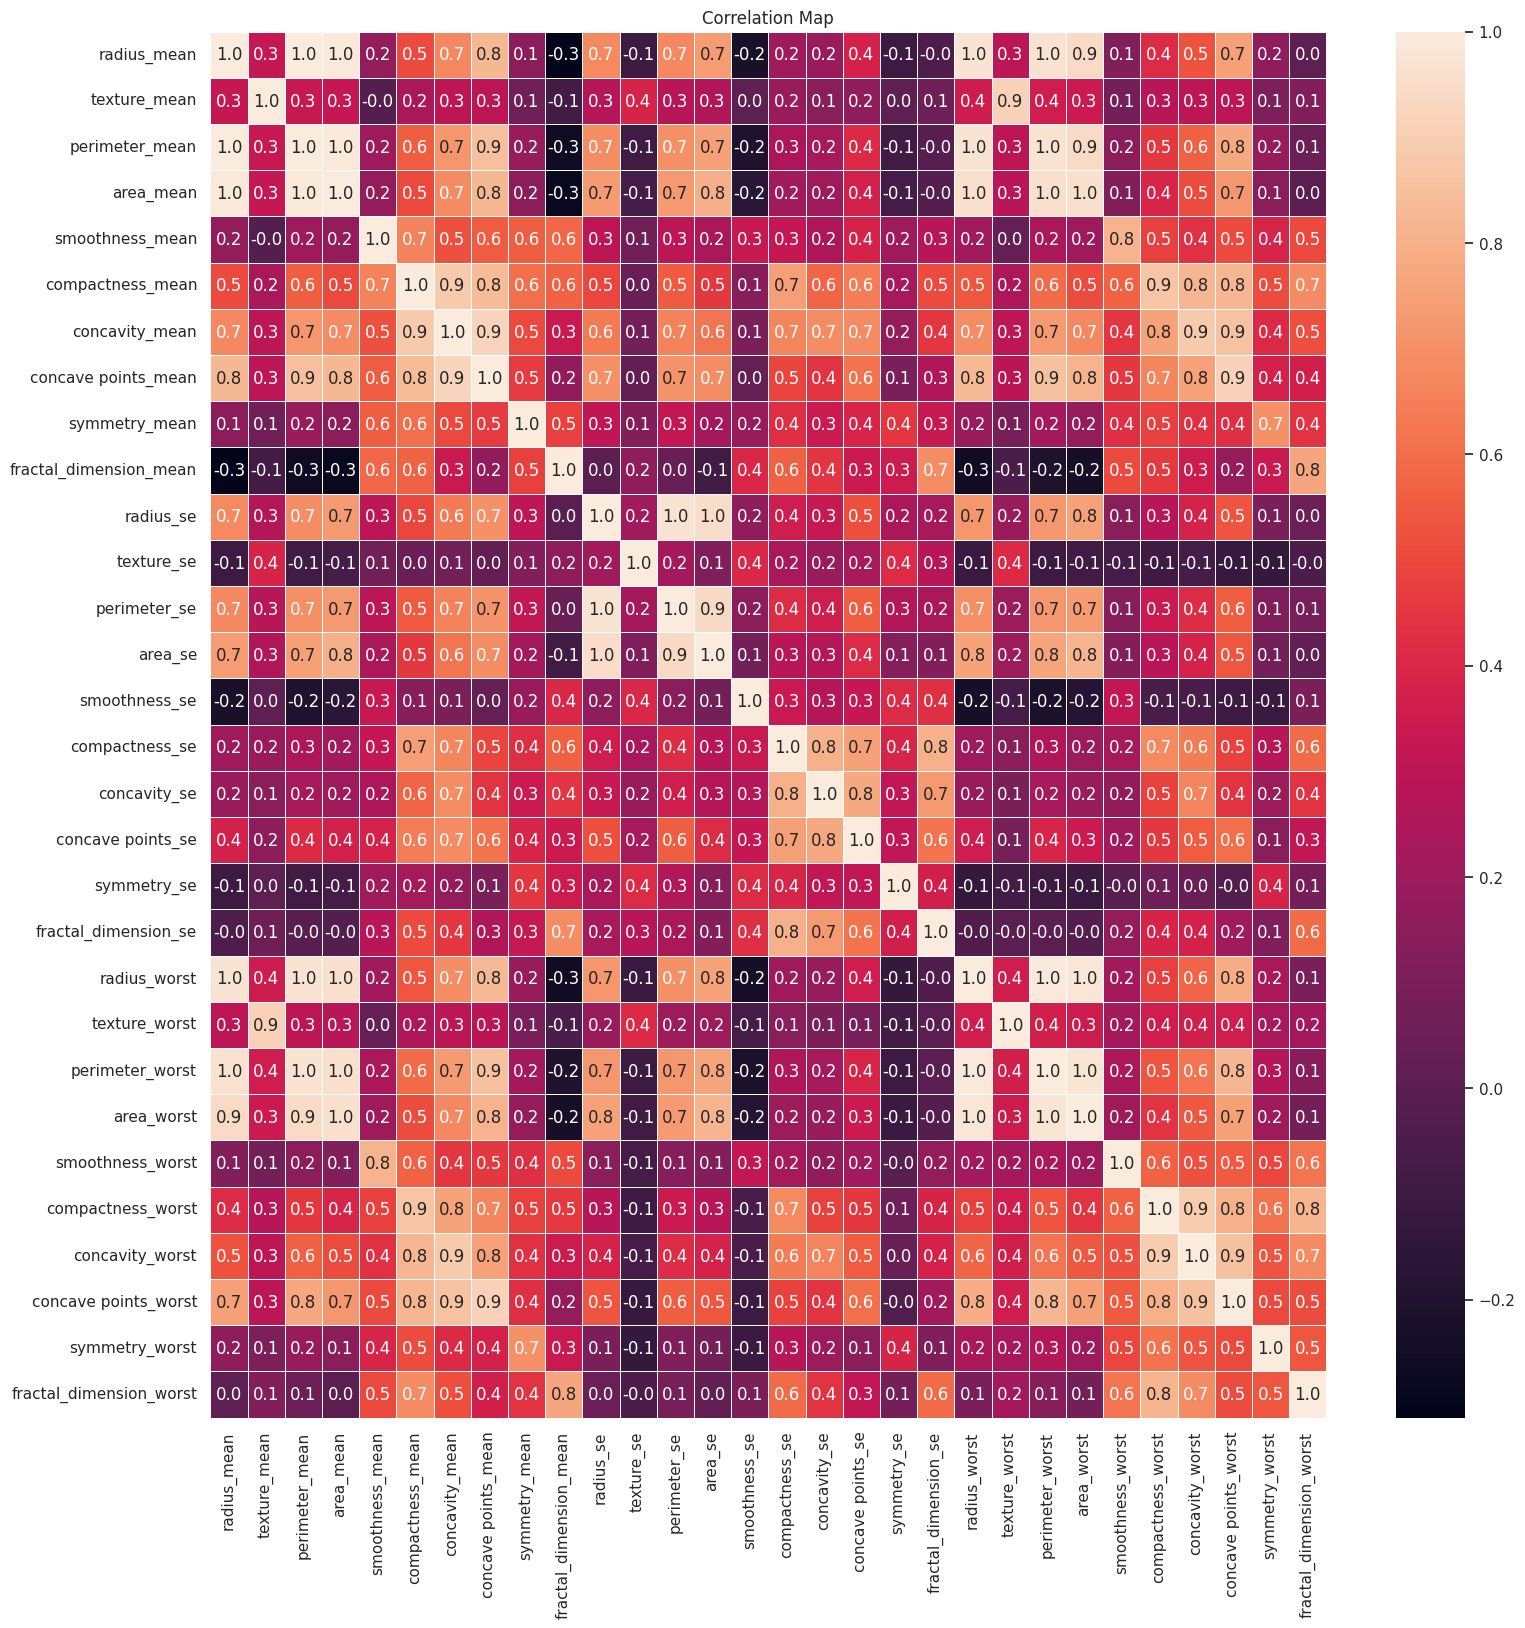

In [ ]:
f,ax=plt.subplots(figsize = (18,18))
# create a copy of the DataFrame and drop the diagnosis column
data_numeric = data.drop(columns=['diagnosis'])
sns.heatmap(data_numeric.corr(),annot = True, linewidths = 0.5,fmt = ".1f", ax=ax)
plt.xticks (rotation=90)
plt.yticks (rotation=0)
plt.title('Correlation Map')
plt.savefig('graph.png')
plt.show()

In [ ]:
np.cov(data.radius_mean,data.area_mean)
print("Covariance diantara radius mean dan area mean:",data.radius_mean.cov(data.area_mean))
print("Covariance diantara radius mean dan fractal dimension se: ",data.radius_mean.cov(data.fractal_dimension_se))

Covariance diantara radius mean dan area mean: 1224.483409346457
Covariance diantara radius mean dan fractal dimension se:  -0.0003976248576440629


In [ ]:
p1 = data.loc[:, ["area_mean", "radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)/(data.radius_mean.std()*data.area_mean.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ',p2)

Pearson correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson correlation:  0.9873571700566132


In [ ]:
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:, ["area_mean", "radius_mean"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)









Spearman's correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.999602
radius_mean   0.999602     1.000000


In [ ]:
gaji = [1,4,3,2,5,4,2,3,1,500]
print("Mean/rata-rata dari gaji: ",np.mean(gaji))



Mean/rata-rata dari gaji:  52.5


In [ ]:
print("Median dari gaji: ",np.median(gaji))

Median dari gaji:  3.0


In [ ]:
statistic, p_value = stats.ttest_rel(data.radius_mean, data.area_mean)
print('p-value adalah: ',p_value)



p-value adalah:  1.5253492492559045e-184


mean:  109.9956515950125
standart deviation: 20.038592584642462


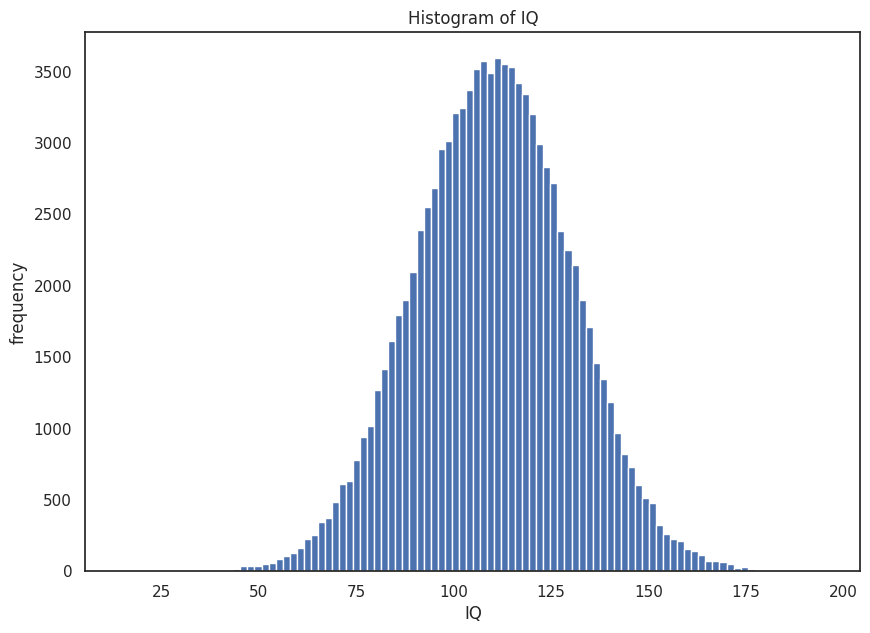

In [ ]:
# parameters of normal distribution
mu, sigma = 110, 20 #mean and standard deviation
## membuat nilai random
s = np.random.normal(mu, sigma, 100000)
print("mean: ", np.mean(s))
print("standart deviation:", np.std(s))
#visualize with histogram
plt.figure(figsize = (10,7))
plt.hist(s, 100, density=False)
plt.ylabel("frequency")
plt.xlabel("IQ")
plt.title("Histogram of IQ")
plt.show()

>Seperti yang dapat dilihat dari histogram sebagian besar orang terakumulasi mendekati 110 yang merupakan rata-rata dari distribusi normal kita

>Namun apa yang "paling" yang saya sebutkan di kalimat sebelumnya? Bagaimana jika saya ingin tahu berapa persentase orang yang harus memiliki skor IQ antara 80 dan 140?


>Kami akan menggunakan z-score untuk menjawab pertanyaan ini.
>z=(x-rata-rata)/std
>z1 (80-110)/20 = -1.5
>z2 (140-110)/20 = 1,5

>Jarak antara mean dan 80 adalah 1,5std dan jarak antara mean dan 140 adalah 1,5std.

>Jika Anda melihat tabel z, Anda akan melihat bahwa 1,5std sesuai dengan 0,4332

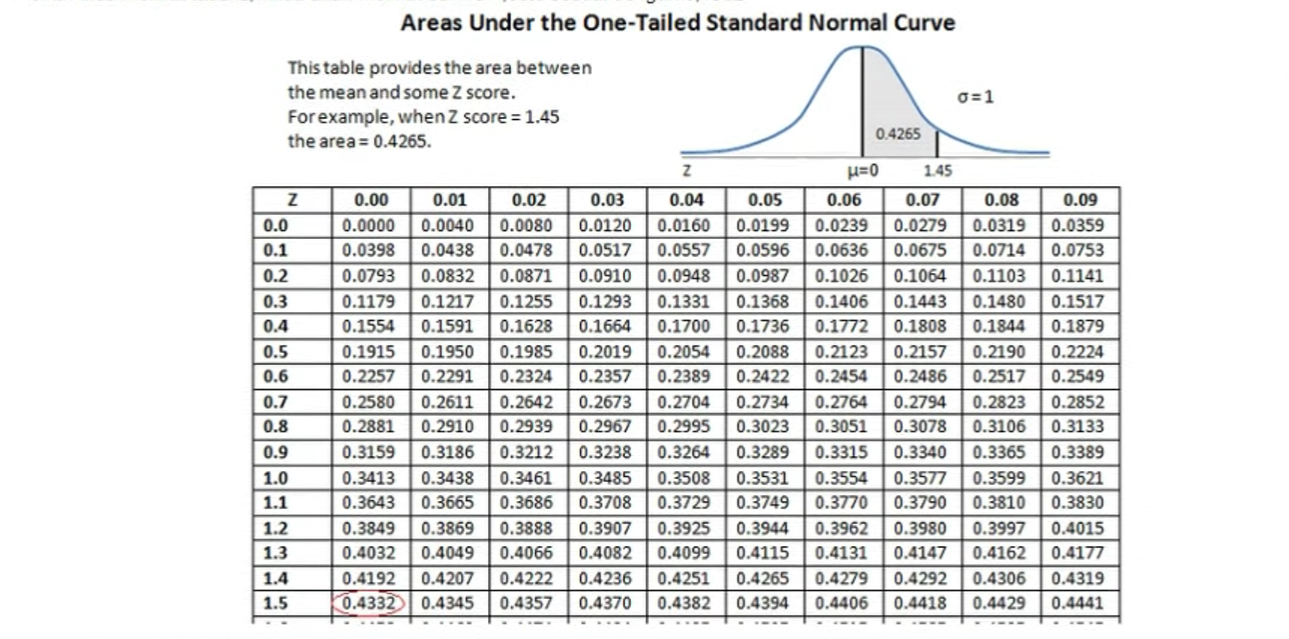

Mari kita hitung dengan 2 karena 1 dari 80 berarti dan lainnya dari rata-rata hingga 140 0,43322 = 0,8664
* 86.64% orang memiliki IQ antara 80 dan 140.

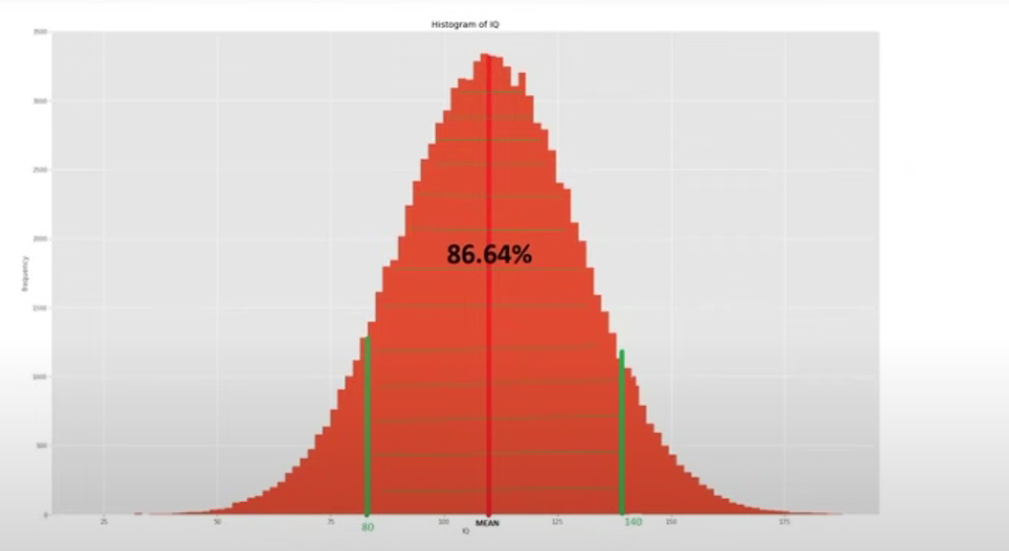

Berapa persentase orang yang seharusnya memiliki skor IQ kurang dari 80?
z = (110-80)/20 = 1,5
Mari kita lihat tabel skor z 0,4332. 43,32% orang memiliki IQ antara 80 dan mean(110).
Jika kita kurangi dari 50% menjadi 43.32%, kita dapat menemukan persentase orang yang memiliki skor IQ kurang dari 80.
50-43,326,68. Hasil dari, 6,68% orang memiliki skor IQ kurang dari 80.